In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(42)

from scipy.stats import norm, ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('default of credit card clients.xls', skiprows=range(1))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [98]:
idx = 0
while idx<np.shape(df)[1]:
    df[df.columns[idx]].isna().value_counts()
    idx += 1

In [99]:
idx = 0
while idx<np.shape(df)[1]:
    print(df[df.columns[idx]].isnull().value_counts())
    idx += 1

False    30000
Name: ID, dtype: int64
False    30000
Name: LIMIT_BAL, dtype: int64
False    30000
Name: SEX, dtype: int64
False    30000
Name: EDUCATION, dtype: int64
False    30000
Name: MARRIAGE, dtype: int64
False    30000
Name: AGE, dtype: int64
False    30000
Name: PAY_0, dtype: int64
False    30000
Name: PAY_2, dtype: int64
False    30000
Name: PAY_3, dtype: int64
False    30000
Name: PAY_4, dtype: int64
False    30000
Name: PAY_5, dtype: int64
False    30000
Name: PAY_6, dtype: int64
False    30000
Name: BILL_AMT1, dtype: int64
False    30000
Name: BILL_AMT2, dtype: int64
False    30000
Name: BILL_AMT3, dtype: int64
False    30000
Name: BILL_AMT4, dtype: int64
False    30000
Name: BILL_AMT5, dtype: int64
False    30000
Name: BILL_AMT6, dtype: int64
False    30000
Name: PAY_AMT1, dtype: int64
False    30000
Name: PAY_AMT2, dtype: int64
False    30000
Name: PAY_AMT3, dtype: int64
False    30000
Name: PAY_AMT4, dtype: int64
False    30000
Name: PAY_AMT5, dtype: int64
False    30000

In [3]:
df.rename(columns={'LIMIT_BAL':'BAL'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### FEATURE SELECTION 

In [4]:
payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

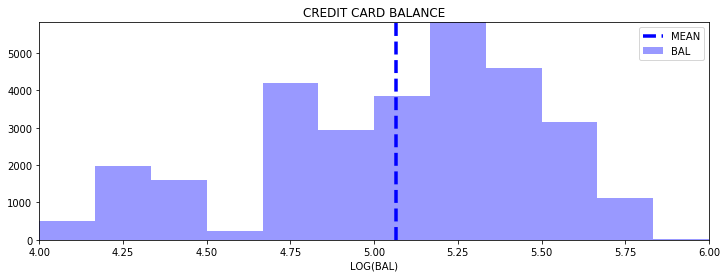

In [102]:
plt.figure(figsize=(12,4))
df['BAL'].apply(np.log10).hist(bins=12, color='blue', alpha=0.4, label='BAL')
bal_avg = np.mean(df['BAL'].apply(np.log10).values)
plt.axvline(bal_avg, linestyle='--', linewidth=3.5, color='blue', label='MEAN')
plt.legend()
plt.grid()
plt.xlabel('LOG(BAL)')
plt.title('CREDIT CARD BALANCE')
plt.autoscale(enable=True, tight=True)
plt.show()

In [103]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [104]:
np.round(df['SEX'].value_counts()[2]*100/df['SEX'].value_counts().sum()), np.round(df['SEX'].value_counts()[1]*100/df['SEX'].value_counts().sum())

(60.0, 40.0)

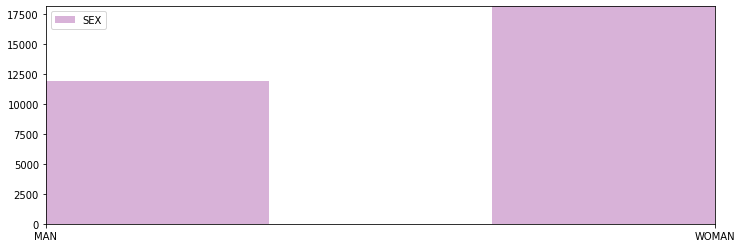

In [105]:
plt.figure(figsize=(12,4))
plt.hist(df['SEX'], bins=3, alpha=0.3, color='purple', label='SEX')
plt.xticks([1,2],('MAN', 'WOMAN'))
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.show()

In [106]:
df['EDUCATION'].value_counts()/df['EDUCATION'].value_counts().sum()

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64

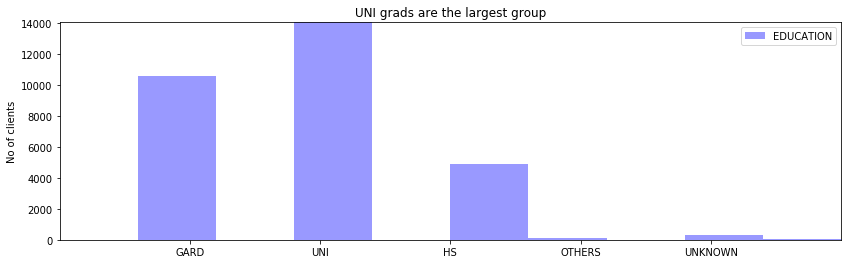

In [107]:
plt.figure(figsize=(14,4))
df['EDUCATION'].hist(color='blue', alpha=0.4, label=['EDUCATION'] )
plt.grid()
plt.legend()
plt.title('UNI grads are the largest group')
plt.xticks( [1,2,3,4,5], ('GARD','UNI','HS','OTHERS','UNKNOWN') )
plt.ylabel('No of clients')
plt.autoscale(enable=True, tight=True)
plt.show()

In [108]:
df['MARRIAGE'].value_counts()/df['MARRIAGE'].value_counts().sum()

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

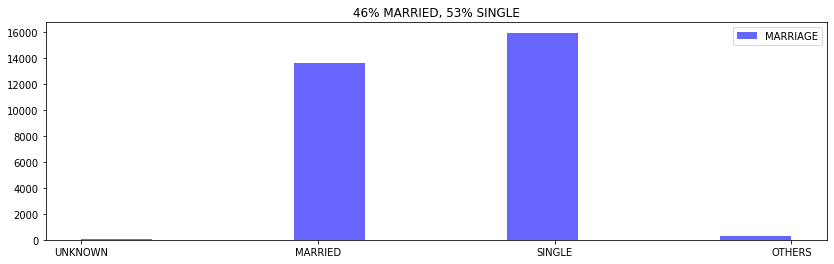

In [109]:
plt.figure(figsize=(14,4))
df['MARRIAGE'].hist(color='blue', alpha=0.6, label='MARRIAGE')
plt.xticks([1, 2, 3, 0], ('MARRIED', 'SINGLE', 'OTHERS', 'UNKNOWN'))
plt.autoscale(enable=True)
plt.legend()
plt.title('46% MARRIED, 53% SINGLE')
plt.grid()
plt.show()

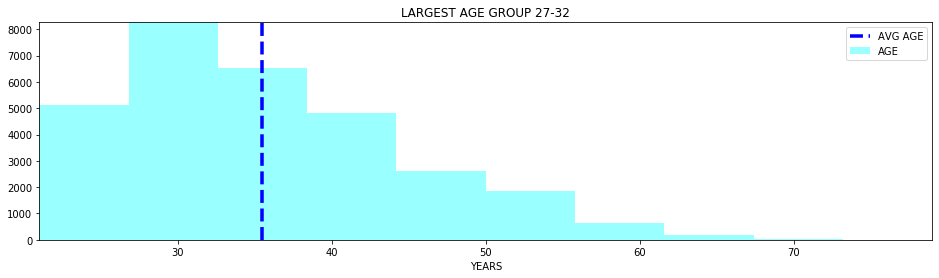

In [110]:
plt.figure(figsize=(16,4))
df['AGE'].hist(color='cyan', alpha=0.4, label='AGE')
plt.title('LARGEST AGE GROUP 27-32')
plt.axvline(df['AGE'].mean(), color='blue', linestyle='--', linewidth=3.5, label='AVG AGE')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.grid()
plt.xlabel('YEARS')
plt.show()

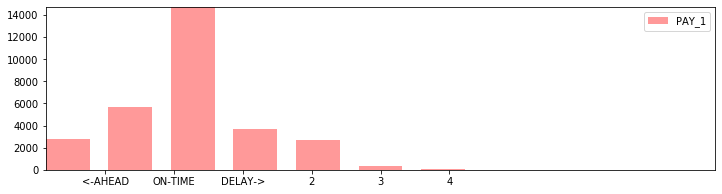

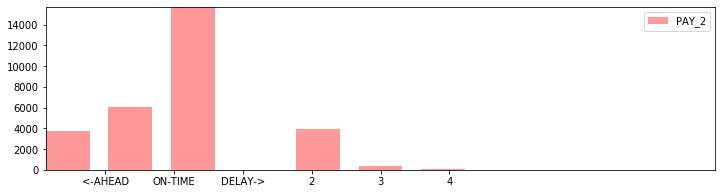

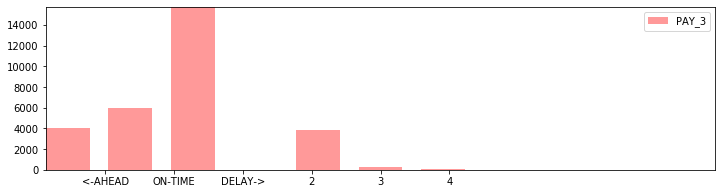

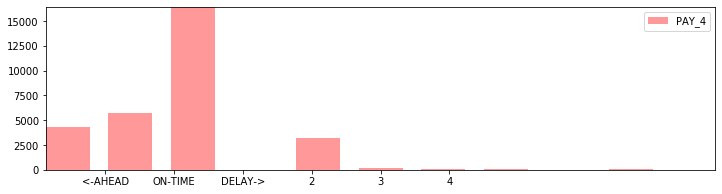

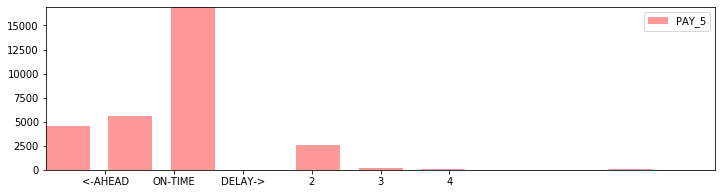

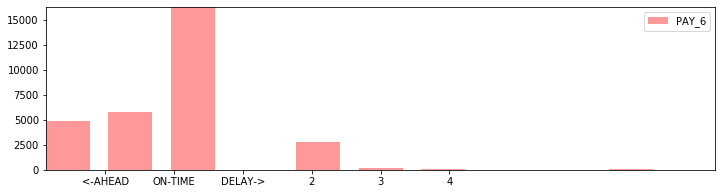

In [5]:
#payments = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay in payments:
    plt.figure(figsize=(12,3))
    df[pay].hist(bins=11, color='red', alpha=0.4, rwidth=0.7, label=pay)
    plt.grid()
    plt.legend()
    plt.xticks([-2,-1,0,1,2,3,4], ('-2', '<-AHEAD', 'ON-TIME', 'DELAY->', '2', '3', '4'))
    plt.autoscale(tight=True, enable=True)
    plt.show()

## BINARY CLASSIFICATION

In [112]:
len(df.columns), df.columns

(25,
 Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
        'default payment next month'],
       dtype='object'))

We would classify customers into two groups 

### (1) CREDITABLE CUSTOMER (CC)
### (2) NOT CREDITABLE CUSTOMER (NCC)

In [6]:
attr = [ 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 
new_attr = [ 'PAY_1B', 'PAY_2B', 'PAY_3B', 'PAY_4B', 'PAY_5B', 'PAY_6B' ]

In [7]:
itm = 0
for col in new_attr:
    print(col, attr[itm])
    df[col] = df[attr[itm]].apply(lambda x: 1 if (x<=1) else 0)
    itm = itm + 1 

PAY_1B PAY_1
PAY_2B PAY_2
PAY_3B PAY_3
PAY_4B PAY_4
PAY_5B PAY_5
PAY_6B PAY_6


In [8]:
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PAY_1B,PAY_2B,PAY_3B,PAY_4B,PAY_5B,PAY_6B
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,0,0,1,1,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,1,0,1,1,1,0
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,1,1,1,1,1,1
3,4,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,1,1,1,1,1,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,1,1,1,1,1,1


In [9]:
df['PAY_1B'].value_counts()

1    26870
0     3130
Name: PAY_1B, dtype: int64

In [10]:
not_default = []
default = [] 
for col in new_attr:
    print(df[col].value_counts())
    not_default.append(df[col].value_counts().tolist()[0])
    default.append(df[col].value_counts().tolist()[1])

1    26870
0     3130
Name: PAY_1B, dtype: int64
1    25590
0     4410
Name: PAY_2B, dtype: int64
1    25791
0     4209
Name: PAY_3B, dtype: int64
1    26492
0     3508
Name: PAY_4B, dtype: int64
1    27032
0     2968
Name: PAY_5B, dtype: int64
1    26921
0     3079
Name: PAY_6B, dtype: int64


In [11]:
not_default

[26870, 25590, 25791, 26492, 27032, 26921]

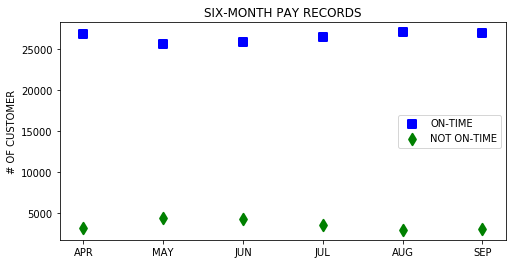

In [12]:
plt.figure(figsize=(8,4))
plt.scatter(np.arange(1,7,1),not_default, s=2**6, c='blue', marker='s',label='ON-TIME', linewidths=2)
plt.scatter(np.arange(1,7,1),default, s=2**6, c='green', marker='d',linewidths=2, label='NOT ON-TIME' )
plt.autoscale(enable=True)
plt.title('SIX-MONTH PAY RECORDS')
plt.ylabel('# OF CUSTOMER')
plt.legend()
plt.xticks([1,2,3,4,5,6],('APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

#### EDUCATION

Now we would check whether PAY_REC shows significant variation in terms of education. In this column

1 => Grad School

2 => University

3 => High School 

In [105]:
dfe1 = df[df['EDUCATION']==1]; dfe2 = df[df['EDUCATION']==2];dfe3 = df[df['EDUCATION']==3]
dfs = [ dfe1, dfe2, dfe3 ]

l_e_CC = [] # 9817, 9441, 9453
l_e_NCC = []

for item in dfs:
    C = len(item)
    print(C)
    for col in new_attr:
        #print(item[col].value_counts())
        l_e_CC.append(item[col].value_counts().tolist()[0]/C)
        l_e_NCC.append(item[col].value_counts().tolist()[1]/C)
            

10585
14030
4917


In [106]:
l_e_CC = np.array(l_e_CC)
l_e_NCC = np.array(l_e_NCC)

In [107]:
l_e_CC = np.reshape(l_e_CC, (3,6))
l_e_NCC = np.reshape(l_e_NCC, (3,6))

In [108]:
l_e_CC

array([[0.9274445 , 0.89192253, 0.89305621, 0.91289561, 0.92328767,
        0.91572981],
       [0.88153956, 0.83228795, 0.84262295, 0.86707056, 0.88745545,
        0.88389166],
       [0.86353468, 0.81777507, 0.82529998, 0.85519626, 0.8836689 ,
        0.8879398 ]])

In [109]:
np.shape(l_e_CC)

(3, 6)

In [110]:
l_e_CC[0,:]

array([0.9274445 , 0.89192253, 0.89305621, 0.91289561, 0.92328767,
       0.91572981])

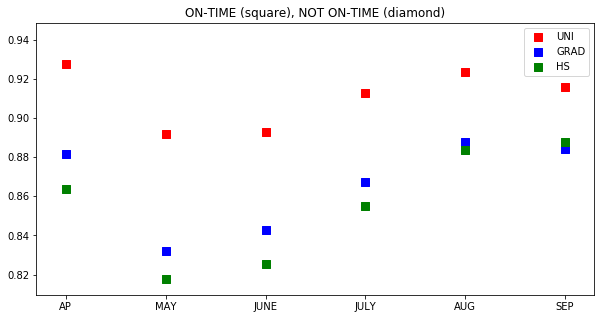

In [111]:
plt.figure(figsize=(10,5))

lab = ['UNI', 'GRAD', 'HS']
colors = ['r', 'b', 'g']

for idx in range(0,3,1):
    plt.scatter(np.arange(1,7,1), l_e_CC[idx,:], label=lab[idx], c=colors[idx], s=2**6, marker='s')
    #plt.scatter(np.arange(1,7,1), l_e_NCC[idx,:], label=lab[idx],c=colors[idx], s=2**6, marker='d' )
    
plt.title('ON-TIME (square), NOT ON-TIME (diamond)')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.legend()
plt.show()

In [112]:
x = l_e_CC[0,:]
xx = x.tolist()

In [115]:
a1 = np.transpose(xx)

In [116]:
a1

array([0.9274445 , 0.89192253, 0.89305621, 0.91289561, 0.92328767,
       0.91572981])

In [117]:
np.shape(a1)

(6,)

#### MARRIAGE

In [37]:
dfm1 = df[df['MARRIAGE']==1]; dfm2 = df[df['MARRIAGE']==2]; dfm3 = df[df['MARRIAGE']==3]
dfs = [ dfm1, dfm2, dfm3 ]

l_m_CC = [] # 9817, 9441, 9453
l_m_NCC = []

for item in dfs:
    C1 = len(item)
    print(C1)
    for col in new_attr:
        #print(item[col].value_counts())
        l_m_CC.append(item[col].value_counts().tolist()[0]/C1)
        l_m_NCC.append(item[col].value_counts().tolist()[1]/C1)
            

13659
15964
323


In [38]:
l_m_CC = np.array(l_m_CC)
l_m_NCC = np.array(l_m_NCC)

In [39]:
l_m_CC = np.reshape(l_m_CC, (3,6))
l_m_NCC = np.reshape(l_m_NCC, (3,6))

In [40]:
l_m_CC

array([[0.89135369, 0.84903726, 0.85943334, 0.88081119, 0.90006589,
        0.89838202],
       [0.89946129, 0.8564896 , 0.86037334, 0.88530443, 0.90152844,
        0.8965798 ],
       [0.88854489, 0.85139319, 0.84829721, 0.87616099, 0.92260062,
        0.89783282]])

In [41]:
l_m_CC[0,:]

array([0.89135369, 0.84903726, 0.85943334, 0.88081119, 0.90006589,
       0.89838202])

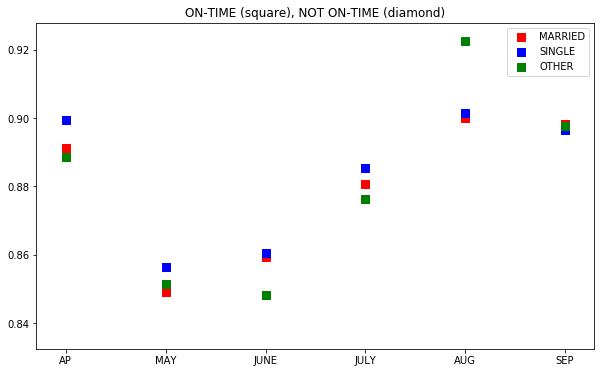

In [118]:
plt.figure(figsize=(10,6))

lab = ['MARRIED', 'SINGLE', 'OTHER']
colors = ['r', 'b', 'g']

for idx in range(0,3,1):
    plt.scatter(np.arange(1,7,1), l_m_CC[idx,:], label=lab[idx], c=colors[idx], s=2**6, marker='s')
    #plt.scatter(np.arange(1,7,1), l_m_NCC[idx,:], label=lab[idx],c=colors[idx], s=2**6, marker='d' )
    
plt.title('ON-TIME (square), NOT ON-TIME (diamond)')
plt.xticks([1,2,3,4,5,6],('AP', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP'))
plt.legend()
plt.show()

#### Also Married and Single show similar trend for month to month payment. 

### CLASSIFICATION: PAY STATUS
#### AGE

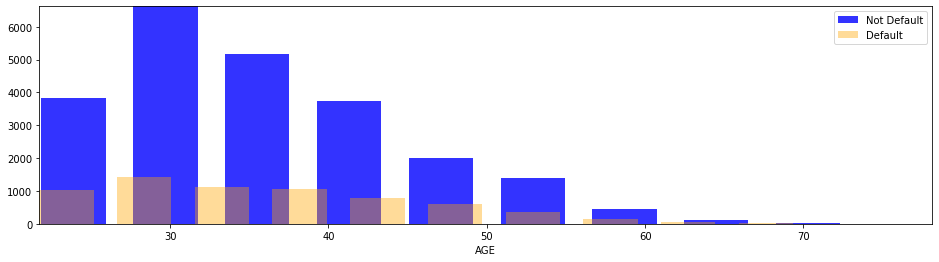

In [133]:
plt.figure(figsize=(16,4))
df_nd = df[df['default payment next month']==0]
df_d = df[df['default payment next month']==1]
df_nd['AGE'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['AGE'].hist(bins=11, alpha=0.4, color='orange', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('AGE')
plt.grid()
plt.show()

#### BALANCE

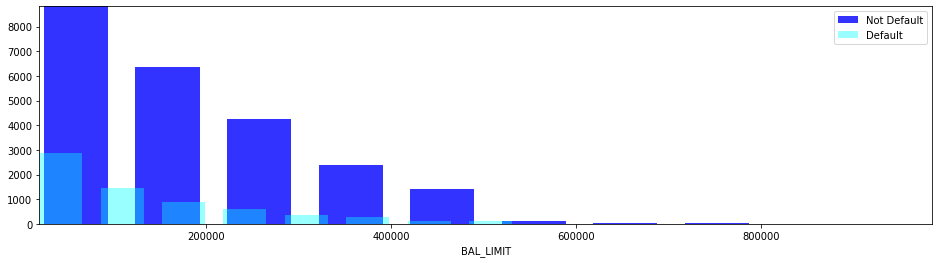

In [134]:
plt.figure(figsize=(16,4))
df_nd['BAL'].hist(bins=10, alpha=0.8, color='blue', rwidth=0.7, label='Not Default')
df_d['BAL'].hist(bins=11, alpha=0.4, color='cyan', rwidth=0.7, label='Default')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.xlabel('BAL_LIMIT')
plt.grid()
plt.show()

#### EDUCATION

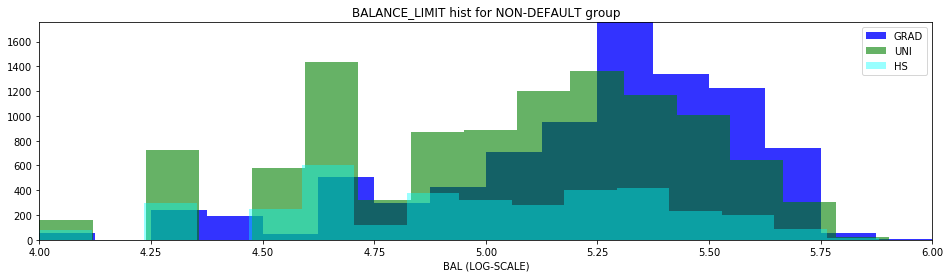

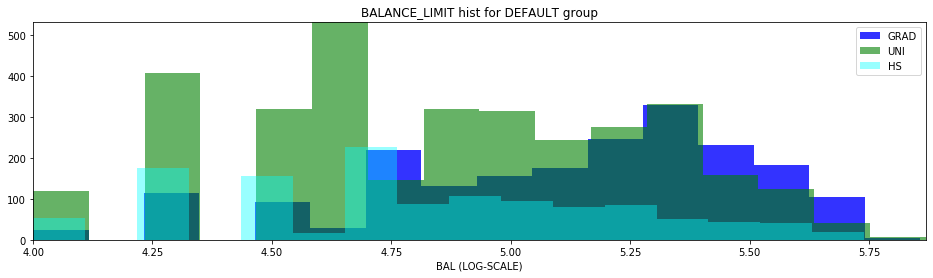

In [135]:
edu1 = df_nd[df_nd['EDUCATION']==1]; edu2 = df_nd[df_nd['EDUCATION']==2]; edu3 = df_nd[df_nd['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

edu1 = df_d[df_d['EDUCATION']==1]; edu2 = df_d[df_d['EDUCATION']==2]; edu3 = df_d[df_d['EDUCATION']==3]
plt.figure(figsize=(16,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='blue', label='GRAD')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='green', label='UNI')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='cyan', label='HS')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### MARRITAL STATUS

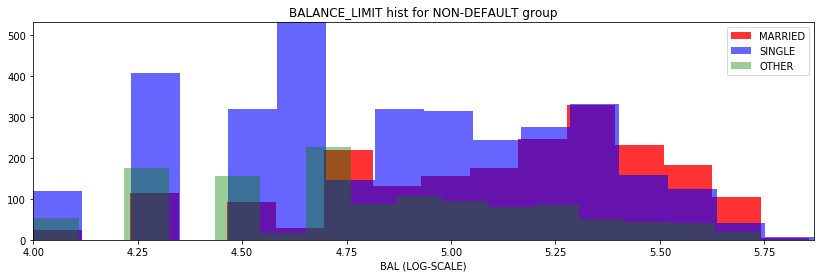

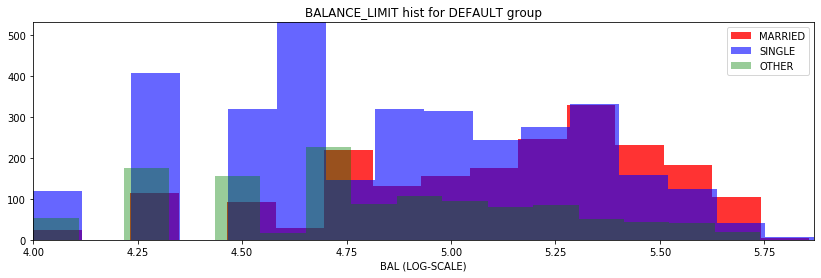

In [136]:
msta1 = df_nd[df_nd['MARRIAGE']==1]; msta12 = df_nd[df_nd['MARRIAGE']==2]; msta13 = df_nd[df_nd['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for NON-DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

msta1 = df_d[df_d['MARRIAGE']==1]; msta12 = df_d[df_d['MARRIAGE']==2]; msta13 = df_d[df_d['MARRIAGE']==3]
plt.figure(figsize=(14,4))
edu1['BAL'].apply(np.log10).hist(bins=16, alpha=0.8, color='red', label='MARRIED')
edu2['BAL'].apply(np.log10).hist(bins=16, alpha=0.6, color='blue', label='SINGLE')
edu3['BAL'].apply(np.log10).hist(bins=16, alpha=0.4, color='green', label='OTHER')
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('BALANCE_LIMIT hist for DEFAULT group')
plt.xlabel('BAL (LOG-SCALE)')
plt.grid()
plt.show()

#### AGE

### INFERENTIAL STATISTICS

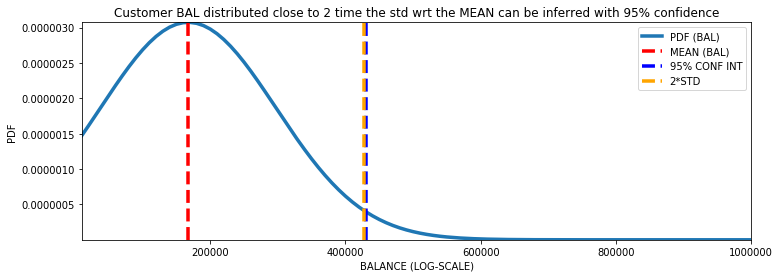

In [137]:
bal = np.sort(df['BAL'].values)
bal_pdf = norm.pdf(bal, loc=np.mean(bal), scale=np.std(bal))
bal_cdf = norm.cdf(bal, loc=np.mean(bal), scale=np.std(bal))
plt.figure(figsize=(12,4))
plt.plot(bal, bal_pdf, label='PDF (BAL)',linewidth=3.5)
plt.axvline(np.mean(bal), linestyle='--', color='red', label='MEAN (BAL)', linewidth=3.5)
plt.axvline(np.percentile(bal, [95]), linestyle='--', color='blue', label='95% CONF INT',linewidth=3.5)
plt.axvline(np.mean(bal)+2*np.std(bal), linestyle='--', color='orange', label='2*STD',linewidth=3.5)
plt.autoscale(enable=True, tight=True)
plt.legend()
plt.title('Customer BAL distributed close to 2 time the std wrt the MEAN can be inferred with 95% confidence')
plt.xlabel('BALANCE (LOG-SCALE)')
plt.ylabel('PDF')
plt.show()

#### As we see 95% of the customer balance is within 2*STD of the mean.

In [138]:
ttest_ind(df_nd['BAL'].values, df_d['BAL'].values, equal_var=False)

Ttest_indResult(statistic=28.951587933509845, pvalue=3.3641002455114717e-178)

### PREDICTION: MACHINE LEARNING

In [139]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY_1B', 'PAY_2B', 'PAY_3B', 'PAY_4B',
       'PAY_5B', 'PAY_6B'],
      dtype='object')

### Feature Engineering

In [140]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY_1B', 'PAY_2B', 'PAY_3B', 'PAY_4B',
       'PAY_5B', 'PAY_6B'],
      dtype='object')

In [141]:
df[ ['BILL_AMT1', 'PAY_AMT1'] ][0:10]

,BILL_AMT1,PAY_AMT1
0,3913,0
1,2682,0
2,29239,1518
3,46990,2000
4,8617,2000
5,64400,2500
6,367965,55000
7,11876,380
8,11285,3329
9,0,0


In [142]:
PAY = []
for idx in range(6): 
    for j in range(len(df)):  # len(df)
        if (3*df[str(df.columns[idx+12])].iloc[j]) < (df[str(df.columns[idx+18])].iloc[j]):
            PAY.append(-2)
        elif (2*df[str(df.columns[idx+12])].iloc[j]) < (df[str(df.columns[idx+18])].iloc[j]):
            PAY.append(-1)
        elif (df[str(df.columns[idx+12])].iloc[j]) <= (df[str(df.columns[idx+18])].iloc[j]):
            PAY.append(0)
        elif (0.5*df[str(df.columns[idx+12])].iloc[j]) > (df[str(df.columns[idx+18])].iloc[j]):
            PAY.append(1)
        else:
            PAY.append(2)

In [143]:
payr = np.array(PAY).reshape(6,len(df))
payr[:,0:10]

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
       [ 1,  2,  1,  1, -2,  1,  1,  0,  1,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  0],
       [ 0,  1,  1,  1,  1,  1,  1, -1,  1, -2],
       [ 0,  1,  1,  1,  1,  1,  1, -2,  1,  1],
       [ 0,  2,  1,  1,  1,  1,  1, -1,  1,  1]])

In [144]:
np.shape(payr)

(6, 30000)

In [145]:
col = ['PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']
for idx in range(6):
    #print(payr[idx,:])
    df[col[idx]] = payr[idx,:]

In [146]:
df['PAY-FE-1'].value_counts()/df['PAY-FE-1'].value_counts().sum()

 1    0.732067
 0    0.117833
-2    0.080800
 2    0.052300
-1    0.017000
Name: PAY-FE-1, dtype: float64

It shows on the first month most of the customer paid less 

In [147]:
df['PAY-FE-2'].value_counts()/df['PAY-FE-2'].value_counts().sum()

 1    0.716633
 0    0.129100
-2    0.087167
 2    0.048967
-1    0.018133
Name: PAY-FE-2, dtype: float64

In [148]:
df['PAY-FE-3'].value_counts()/df['PAY-FE-3'].value_counts().sum()

 1    0.715800
 0    0.138800
-2    0.084167
 2    0.045700
-1    0.015533
Name: PAY-FE-3, dtype: float64

In [149]:
df['PAY-FE-4'].value_counts()/df['PAY-FE-4'].value_counts().sum()

 1    0.715967
 0    0.144833
-2    0.082567
 2    0.043567
-1    0.013067
Name: PAY-FE-4, dtype: float64

In [150]:
df['PAY-FE-5'].value_counts()/df['PAY-FE-5'].value_counts().sum()

 1    0.693467
 0    0.155867
-2    0.084833
 2    0.049200
-1    0.016633
Name: PAY-FE-5, dtype: float64

In [151]:
df['PAY-FE-6'].value_counts()/df['PAY-FE-6'].value_counts().sum()

 1    0.671633
 0    0.173667
-2    0.089367
 2    0.049000
-1    0.016333
Name: PAY-FE-6, dtype: float64

In [152]:
df.head()

,ID,BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_3B,PAY_4B,PAY_5B,PAY_6B,PAY-FE-1,PAY-FE-2,PAY-FE-3,PAY-FE-4,PAY-FE-5,PAY-FE-6
0,1,20000,2,2,1,24,2,2,-1,-1,...,1,1,1,1,1,1,1,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,1,1,1,0,1,2,1,1,1,2
2,3,90000,2,2,2,34,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,4,50000,2,2,1,37,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,1,1,1,1,1,-2,1,1,1,1


In [153]:
df.columns

Index(['ID', 'BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PAY_1B', 'PAY_2B', 'PAY_3B', 'PAY_4B',
       'PAY_5B', 'PAY_6B', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4',
       'PAY-FE-5', 'PAY-FE-6'],
      dtype='object')

In [154]:
#col_PA = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6']

In [155]:
df['BAL'] = df['BAL'].apply(np.log10)

In [156]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']


In [157]:
# cols = ['BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3',
#        'PAY-FE-4', 'PAY-FE-5', 'PAY-FE-6']

In [158]:
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(df[cols].values).transform(df[cols].values)

In [159]:
X[0:3,:]

array([[ 1.79456386,  1.78234817, -0.69666346, -0.66659873, -1.53004603,
        -1.48604076,  0.37122506,  0.40005849,  0.40563852, -0.6805806 ,
        -0.6457115 , -0.60187762,  0.81016074,  0.18582826, -1.05729503,
        -1.24601985, -1.8695978 ],
       [-0.87499115,  1.78234817,  0.1388648 ,  0.18874609,  0.23491652,
         1.99231551,  0.37122506,  1.45869435,  0.40563852,  0.40852262,
         0.42058151,  1.49318865,  0.81016074,  0.18582826,  0.85855728,
        -1.02904717,  0.03426257],
       [ 0.01486052,  0.1117361 ,  0.1388648 ,  0.18874609,  0.23491652,
         0.25313738,  0.37122506,  0.40005849,  0.40563852,  0.40852262,
         0.42058151,  0.44565552,  0.81016074,  0.18582826,  0.85855728,
        -0.16115646, -0.27141824]])

In [160]:
y = df['default payment next month']

In [161]:
y.value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

#### LogisticRegression

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
x_tr, x_t, y_tr, y_t = train_test_split( X, y, test_size=0.35, random_state=100)
lr = LogisticRegression()
lr.fit(x_tr, y_tr)
y_p = lr.predict(x_t)
y_tr_p = lr.predict(x_tr)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8041904761904762 ROC score :  0.6050312395820162

classification report : 

               precision    recall  f1-score   support

           0       0.81      0.97      0.88      8092
           1       0.72      0.24      0.36      2408

   micro avg       0.80      0.80      0.80     10500
   macro avg       0.77      0.61      0.62     10500
weighted avg       0.79      0.80      0.76     10500

confusion matrix : 

 [[7873  219]
 [1837  571]]


In [164]:
accuracy = accuracy_score(y_tr, y_tr_p)
roc = roc_auc_score(y_tr, y_tr_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_tr, y_tr_p))
print("confusion matrix : \n\n", confusion_matrix(y_tr, y_tr_p))

accuracy score :  0.8085128205128205 ROC score :  0.5972459415218357

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.97      0.89     15272
           1       0.68      0.22      0.34      4228

   micro avg       0.81      0.81      0.81     19500
   macro avg       0.75      0.60      0.61     19500
weighted avg       0.79      0.81      0.77     19500

confusion matrix : 

 [[14818   454]
 [ 3280   948]]


### Gaussian Naive Bayes

In [165]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_tr, y_tr)
y_p = gnb.predict(x_t)
y_tr_p = gnb.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.7935238095238095 ROC score :  0.6811004839692375

classification report : 

               precision    recall  f1-score   support

           0       0.85      0.89      0.87      8092
           1       0.56      0.47      0.51      2408

   micro avg       0.79      0.79      0.79     10500
   macro avg       0.70      0.68      0.69     10500
weighted avg       0.78      0.79      0.79     10500

confusion matrix : 

 [[7192  900]
 [1268 1140]]


### Decision Tree Classifier

In [166]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_p = dtc.predict(x_t)
y_tr_p = dtc.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.7251428571428571 ROC score :  0.6157330237156422

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.82      0.82      8092
           1       0.40      0.41      0.41      2408

   micro avg       0.73      0.73      0.73     10500
   macro avg       0.61      0.62      0.61     10500
weighted avg       0.73      0.73      0.73     10500

confusion matrix : 

 [[6618 1474]
 [1412  996]]


### ExtraTreesClassifier

In [167]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_h = clf_extree.predict(x_t)
y_tr_h = clf_extree.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))


accuracy score :  0.7251428571428571 ROC score :  0.6157330237156422

classification report : 

               precision    recall  f1-score   support

           0       0.82      0.82      0.82      8092
           1       0.40      0.41      0.41      2408

   micro avg       0.73      0.73      0.73     10500
   macro avg       0.61      0.62      0.61     10500
weighted avg       0.73      0.73      0.73     10500

confusion matrix : 

 [[6618 1474]
 [1412  996]]


### Random forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10)
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.816 ROC score :  0.6573237708215981

classification report : 

               precision    recall  f1-score   support

           0       0.83      0.95      0.89      8092
           1       0.69      0.36      0.48      2408

   micro avg       0.82      0.82      0.82     10500
   macro avg       0.76      0.66      0.68     10500
weighted avg       0.80      0.82      0.79     10500

confusion matrix : 

 [[7691  401]
 [1531  877]]


### ensemble.GradientBoostClassifier

In [169]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)


accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8186666666666667 ROC score :  0.664596242053593

classification report : 

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      8092
           1       0.69      0.38      0.49      2408

   micro avg       0.82      0.82      0.82     10500
   macro avg       0.76      0.66      0.69     10500
weighted avg       0.80      0.82      0.80     10500

confusion matrix : 

 [[7681  411]
 [1493  915]]


### GRID SEARCH 

### CROSS-VALIDATION with best grid parameter

In [170]:
x_tr, x_t, y_tr, y_t = train_test_split( df[cols].values, (df['default payment next month']).values, test_size=0.35)


In [171]:
MLclf = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    roc_list.append(roc_auc_score(y_t, y_p))

In [172]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx
        
print('The best classifier from default parameter :', MLclf[best_roc_idx], '\n', 'with roc_auc_score : ', best_roc)       

The best classifier from default parameter : GaussianNB(priors=None, var_smoothing=1e-09) 
 with roc_auc_score :  0.6717430902645725


### Grid Search
#### Random Forest Classifier

In [173]:
df['BAL'] = df['BAL']/1000000.00
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY-FE-1', 'PAY-FE-2', 'PAY-FE-3', 'PAY-FE-4','PAY-FE-5', 'PAY-FE-6', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BAL']
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=0.35, random_state=100)




In [174]:
clf = GaussianNB()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)
y_tr_p = clf.predict(x_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.798 ROC score :  0.6781705158123441

classification report : 

               precision    recall  f1-score   support

           0       0.85      0.90      0.87      8092
           1       0.58      0.46      0.51      2408

   micro avg       0.80      0.80      0.80     10500
   macro avg       0.71      0.68      0.69     10500
weighted avg       0.79      0.80      0.79     10500

confusion matrix : 

 [[7279  813]
 [1308 1100]]


## ML in Depth Analysis 

#### LogisticRegression 

In [175]:
cols = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [176]:
x_tr, x_t, y_tr, y_t = train_test_split(df[cols], df['default payment next month'], test_size=0.4)
clf = LogisticRegression()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.8059166666666666 ROC score :  0.597820809726851

classification report : 

               precision    recall  f1-score   support

           0       0.81      0.98      0.89      9305
           1       0.72      0.22      0.34      2695

   micro avg       0.81      0.81      0.81     12000
   macro avg       0.77      0.60      0.61     12000
weighted avg       0.79      0.81      0.76     12000

confusion matrix : 

 [[9078  227]
 [2102  593]]


#### DecisionTreeClassifier

In [177]:
dtc = DecisionTreeClassifier()
dtc.fit(x_tr, y_tr)
y_t = dtc.predict(x_t)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.93675 ROC score :  0.7570610924474306

classification report : 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97     10575
           1       0.91      0.52      0.66      1425

   micro avg       0.94      0.94      0.94     12000
   macro avg       0.92      0.76      0.81     12000
weighted avg       0.94      0.94      0.93     12000

confusion matrix : 

 [[10498    77]
 [  682   743]]


#### ExtraTreesClassifier

In [178]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
clf_extree = ExtraTreesClassifier()
clf_extree.fit(x_tr, y_tr)
y_p = clf_extree.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9949166666666667 ROC score :  0.9855791962174941

classification report : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10575
           1       0.98      0.97      0.98      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10552    23]
 [   38  1387]]


#### RandomForestClassifier 

In [179]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9905833333333334 ROC score :  0.9767450541246734

classification report : 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10575
           1       0.96      0.96      0.96      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10521    54]
 [   59  1366]]


#### GradientBoostingClassifier 

In [180]:
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier()
clf.fit(x_tr, y_tr)
accuracy = accuracy_score(y_t, y_p)
roc = roc_auc_score(y_t, y_p)
print("accuracy score : ", accuracy, "ROC score : ", roc)
print("\nclassification report : \n\n", classification_report(y_t, y_p))
print("confusion matrix : \n\n", confusion_matrix(y_t, y_p))

accuracy score :  0.9905833333333334 ROC score :  0.9767450541246734

classification report : 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10575
           1       0.96      0.96      0.96      1425

   micro avg       0.99      0.99      0.99     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.99      0.99      0.99     12000

confusion matrix : 

 [[10521    54]
 [   59  1366]]


### RECEIVER OPERATING CHARACTERSTIC (ROC)

ROC curve is a graphical plot that illustrates the performance of a binary classifier system as its 
discrimination threshold is verified.

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets.


### CROSS VALIDATION 

In [181]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Text(0, 0.5, 'True Positive Rate')

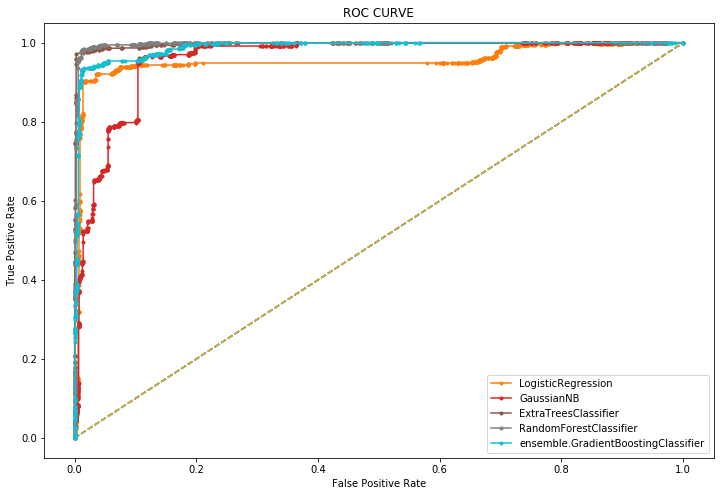

In [182]:
idx = 0
plt.figure(figsize=(12,8))
ns_probs = [0 for _ in range(len(y_t))] # no skill prediction 
MLclf = [LogisticRegression(), GaussianNB(), ExtraTreesClassifier(), RandomForestClassifier(), ensemble.GradientBoostingClassifier() ]
lablist = ['LogisticRegression' , 'GaussianNB', 'ExtraTreesClassifier','RandomForestClassifier','ensemble.GradientBoostingClassifier']
roc_list = []
for clf in MLclf: 
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)
    clf_probs = clf_probs[:, 1]
    ns_auc = roc_auc_score(y_t, ns_probs)
    clf_auc = roc_auc_score(y_t, clf_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_t, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_t, clf_probs) 
    lab_p = lablist[idx] 
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=lab_p ) 
    pyplot.legend()
    idx += 1
    roc_list.append(roc_auc_score(y_t, y_p))
    

plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


In [183]:
best_roc = 0
best_roc_idx = 0

for idx in range(len(roc_list)):
    if (roc_list[idx]>best_roc):
        best_roc = roc_list[idx]
        best_roc_idx = idx

print('The best classifier from default parameter : ExtraTreesClassifier', '\n', 'with roc_auc_score : ', best_roc)
MLclf[best_roc_idx]    

The best classifier from default parameter : ExtraTreesClassifier 
 with roc_auc_score :  0.9848973497573722


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [184]:
help(ExtraTreesClassifier)

Help on class ExtraTreesClassifier in module sklearn.ensemble.forest:

class ExtraTreesClassifier(ForestClassifier)
 |  ExtraTreesClassifier(n_estimators='warn', criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  An extra-trees classifier.
 |  
 |  This class implements a meta estimator that fits a number of
 |  randomized decision trees (a.k.a. extra-trees) on various sub-samples
 |  of the dataset and uses averaging to improve the predictive accuracy
 |  and control over-fitting.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.20
 |         The default